In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from typing import Tuple, List, Dict, Callable
from scipy.interpolate import interp1d
plt.style.use("ggplot")

# Movimiento horizontal: análisis de datos experimentales

# Física y Laboratorio

# Maria Elena 

# Universidad ICESI

# Juan Fernando Angulo Salvador

# Jose Stevens González

# Sebastián García Acosta

# Maria Fernanda Andrade

# Yimmar Tamayo  

# Duván Cuero

En este notebook, se muestra el proceso de análisis y modelado de los datos experimentales obtenidos. El experimento que se condujo consistió en grabar un video donde se evidence el movimiento horizontal de un cuerpo y, con la ayuda de una herramienta rastreadora, registrar las posiciones en el eje horizontal(x) y vertical(y).

El video puede ser accedido por medio de [este enlace](https://drive.google.com/file/d/1A_nDNdiw-mU0AKjcyqxTDQZqb19mBkQN/view?usp=sharing)

A continuación, se leerán los datos obtenidos.

* **t**: es el tiempo (en segundos)
* **x**: es la posición en x del cuerpo en movimiento

In [36]:
df = pd.read_csv("datos_movimiento_horizontal.csv", sep=";")
replace_commas_by_dot = lambda df, col: df[col].str.replace(",",".")
df.t = replace_commas_by_dot(df, "t")
df.x = replace_commas_by_dot(df, "x")
df = df.astype("float")
df = df.iloc[1:, :]
df

,t,x
1,0.0333,0.0435
2,0.0667,0.0748
3,0.1000,0.1000
4,0.1330,0.1230
5,0.1670,0.1450
6,0.2000,0.1670
7,0.2330,0.1870
8,0.2670,0.2030
9,0.3000,0.2190
10,0.3330,0.2330


Tenemos entonces 26 puntos de datos que corresponden a la posición del objeto en un tiempo t. A continuación, haremos una interpolación de esos valores para poder formar una linea más continua.

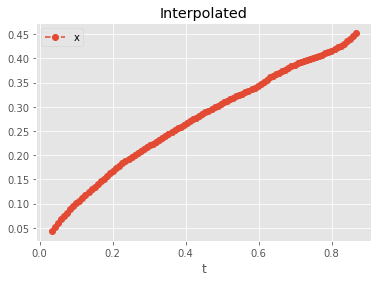

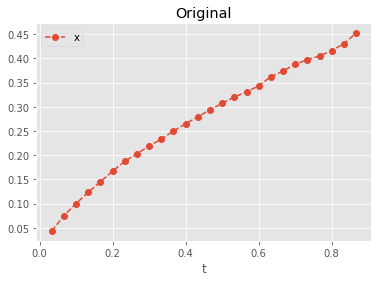

In [37]:
f = interp1d(df.t, df.x)
dominio = np.linspace(df.t.values[0], df.t.values[-1], 100)
data = {
    "t": dominio,
    "x": f(dominio) 
}

df2 = pd.DataFrame(data)
df2.set_index("t").plot(label="Interpolated", linestyle="--", marker="o")
plt.title("Interpolated")
df.set_index("t").plot(label="Original",linestyle="--", marker="o")
plt.title("Original")
plt.legend()
plt.show()

Ahora, nos aproximaremos a la velocidad instantántea  


In [38]:
def add_velocity(df: pd.DataFrame) -> pd.DataFrame:
        vx = [np.nan]
        xs = df.x.values
        ts = df.t.values

        for i in range(len(df)):
                if i > 0 and i+1 < len(df):
                        vel_x = (xs[i+1] - xs[i-1]) / \
                                (ts[i+1] - ts[i-1] )
                        vx.append(vel_x)

        vx.append(np.nan)
        df["vx"] = vx
        return df

df = add_velocity(df)
df2 = add_velocity(df2)
df2

,t,x,vx
0,0.033300,0.043500,NaN
1,0.041721,0.051392,0.937126
2,0.050142,0.059283,0.937126
3,0.058564,0.067175,0.934075
4,0.066985,0.075016,0.843891
...,...,...,...
95,0.833315,0.430204,0.539820
96,0.841736,0.435653,0.647059
97,0.850158,0.441102,0.647059
98,0.858579,0.446551,0.647059


Cuando visualizamos esto, obtenemos las siguientes gráficas

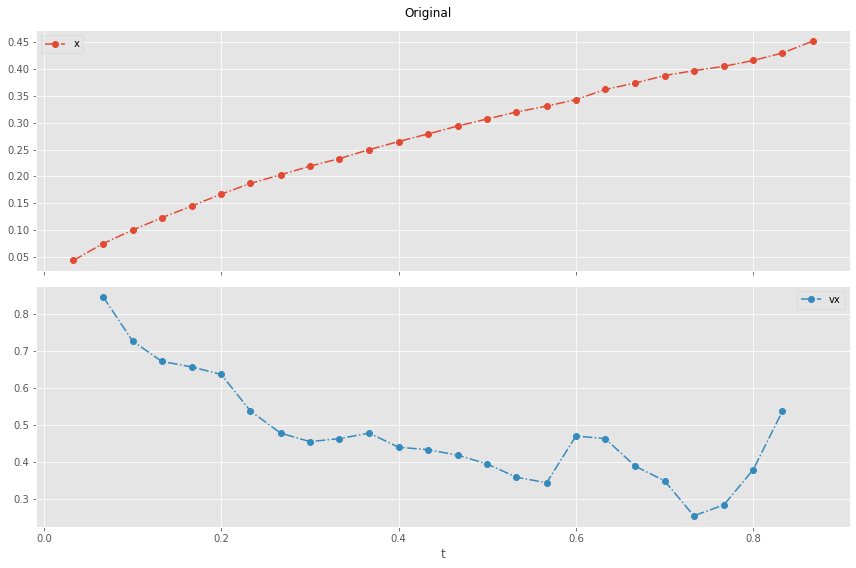

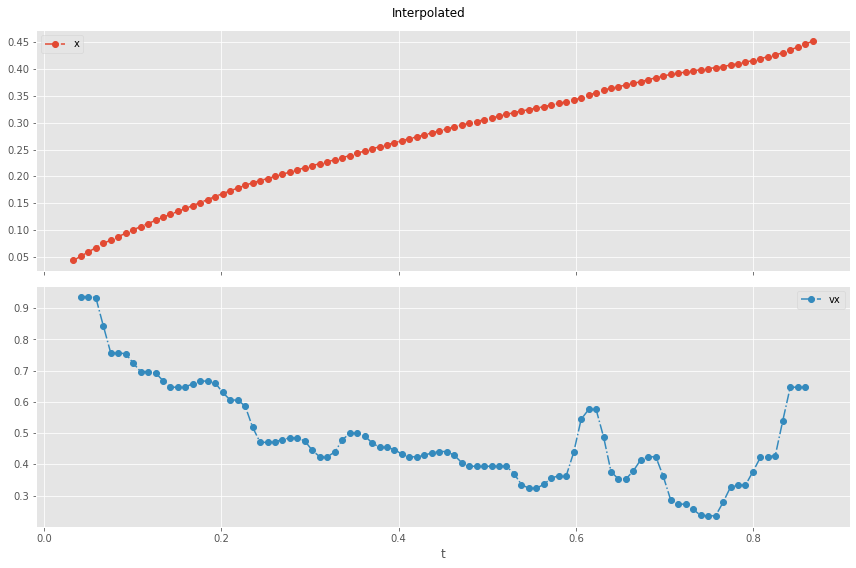

In [39]:
df.set_index("t").plot(subplots=True, figsize=(12,8), linestyle="dashdot", marker="o")
plt.suptitle("Original")
plt.tight_layout()

df2.set_index("t").plot(subplots=True, figsize=(12,8), linestyle="dashdot", marker="o")
plt.suptitle("Interpolated")
plt.tight_layout()

plt.show()

Intentaremos ajustar un polinomio de grado 1 (una recta) a los datos experimentales

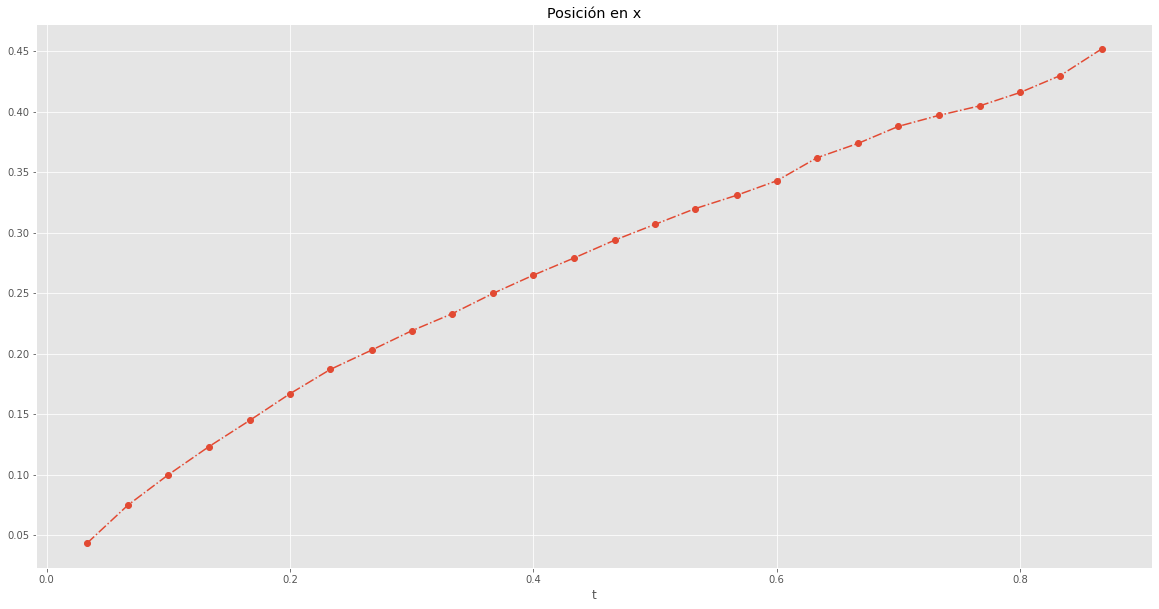

In [41]:
df.set_index("t")["x"].plot(figsize=(20,10), linestyle="dashdot", marker="o")
plt.title("Posición en x")
plt.show()

In [42]:
time_arr = np.expand_dims(df.t.values, 1)
x_arr = np.expand_dims(df.x.values, 1)

In [47]:
lr = LinearRegression().fit(time_arr, x_arr)
print(f"Pendiente: {lr.coef_}")
print("Intercepto:")
lr.intercept_

Pendiente: [[0.45585283]]
Intercepto:


array([0.06826238])

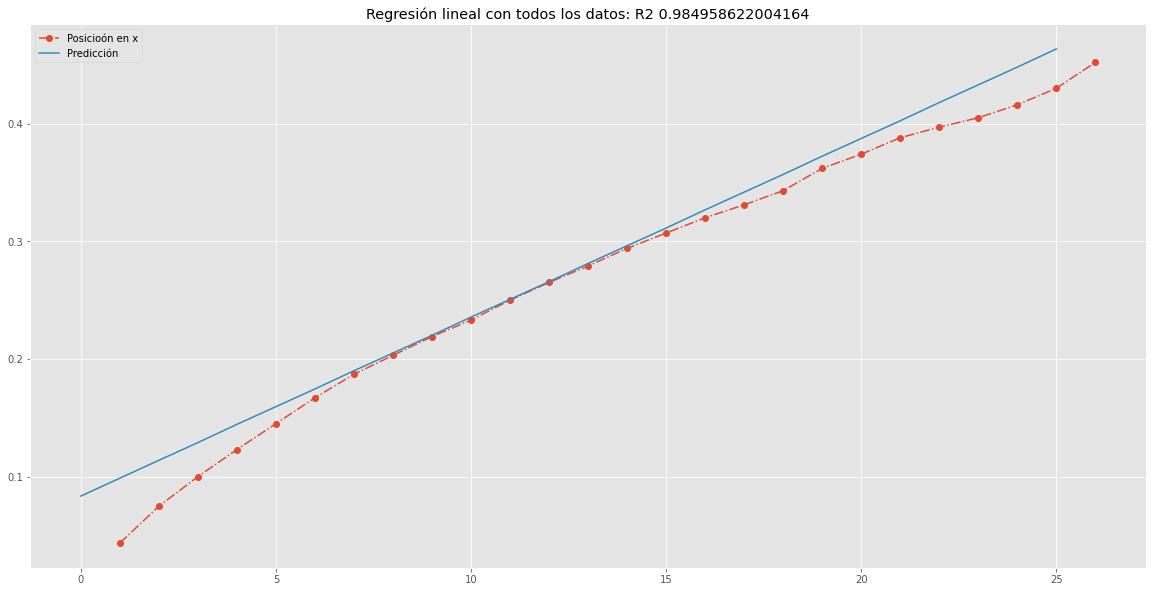

In [48]:
preds = lr.predict(time_arr)

df["x"].plot(figsize=(20,10), marker="o", linestyle="dashdot", label="Posicioón en x")
plt.plot(preds, label="Predicción")
r2 = r2_score(preds, x_arr)
plt.title(f"Regresión lineal con todos los datos: R2 {r2}")
plt.legend()
plt.show()

Observamos que una línea recta no ajusta lo suficiente los datos experimentales obtenidos, así que dividiremos los datos en intervalos.

[[0.4527736]]
[0.07040198]


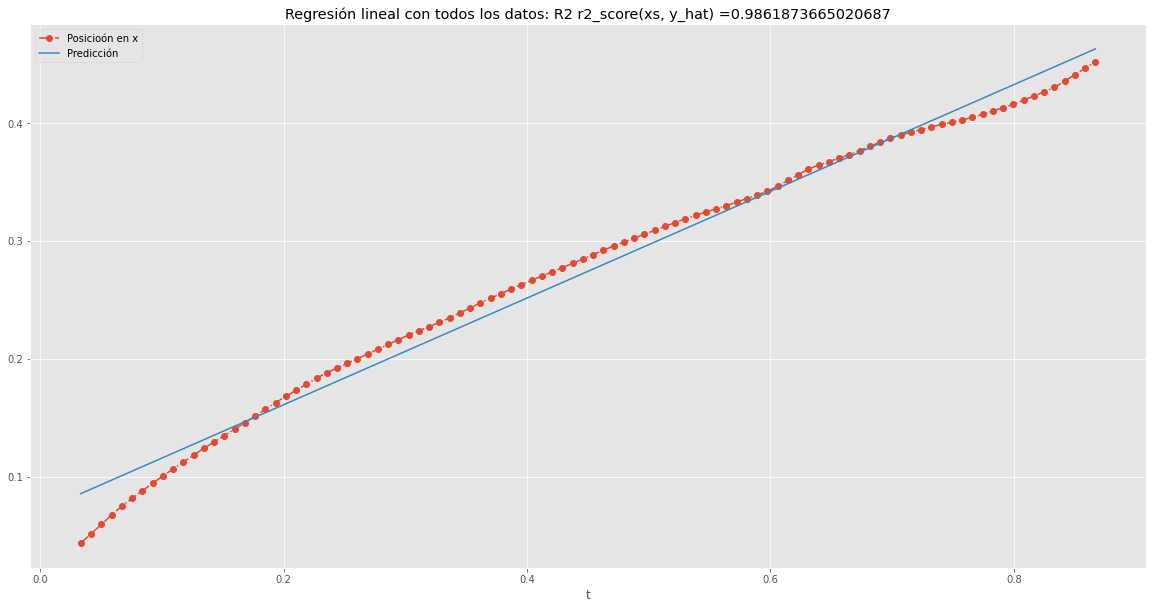

In [49]:
time = df2.t.values.reshape(-1,1)
xs = df2.x.values.reshape(-1,1)
lr = LinearRegression().fit(time, xs)
print(lr.coef_)
print(lr.intercept_)
y_hat = lr.predict(time)

df2.set_index("t")["x"].plot(figsize=(20,10), marker="o", linestyle="dashdot", label="Posicioón en x")
plt.plot(time, y_hat, label="Predicción")
plt.title(f"Regresión lineal con todos los datos: R2 {r2_score(xs, y_hat) =}")
plt.legend()
plt.show()

## Ajustar modelos distintos para intervalos

Intervalos de 0 a 5, de 5 a 20, y de 20 en adelante

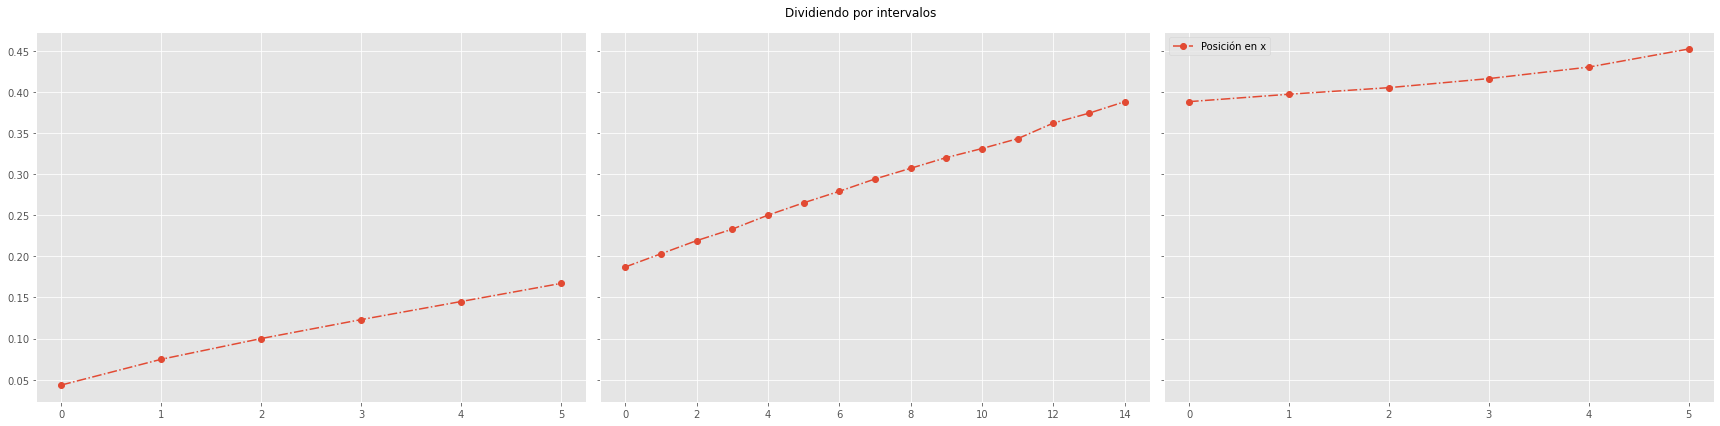

In [50]:
intervals = [range(0,6), range(6,21), range(20, len(df))]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3*8,6), sharey=True)
fig.suptitle("Dividiendo por intervalos")

for i, interval in enumerate(intervals):
    ax[i].plot(df.x.values[interval], linestyle="dashdot", marker="o", label="Posición en x")

plt.legend()
plt.tight_layout()
plt.show()

Ahora, por cada intervalo, ajustaremos un polinomio de diferente grado y observaremos cómo varía su R2

In [75]:
clfs = dict()
degrees = list(range(1,2+1))
data = dict(
    degrees=degrees
)

def fit_polynomial_reg(
        d: float, X: np.ndarray, y: np.ndarray
    ) -> Tuple[float, Tuple[LinearRegression, PolynomialFeatures]]:
    poly = PolynomialFeatures(d)
    X_ = poly.fit_transform(X)

    clf = LinearRegression()
    clf.fit(X_, y)
    preds = clf.predict(X_)
    r2 = r2_score(y, preds)
    return r2, (clf, poly) 

prudent = False
for interval in intervals:
    interval_str = f"[{interval.start}-{interval.stop})"
    if interval_str not in data:
        data[interval_str] = []
    for d in degrees:
        X = np.expand_dims(df.t.values[interval], axis=0).T
        y = np.expand_dims(df.x.values[interval], axis=0).T
        
        r2, clf = fit_polynomial_reg(d, X, y) 
        prev_r2 = data[interval_str]
        if prudent:
            if len(prev_r2) > 1:
                max_prev_r2 = max(prev_r2)
                if max_prev_r2 < 1 and r2 > max_prev_r2:
                    clfs[interval] = clf
        else:
            if d == len(degrees):
                clfs[interval] = clf
                print(d)     
        data[interval_str].append(r2)
        
pd.DataFrame(data)

2
2
2


,degrees,[0-6),[6-21),[20-26)
0,1,0.995234,0.998387,0.961916
1,2,0.999349,0.999258,0.996150


In [77]:
for interval, (clf, poly) in clfs.items():
    print(poly.degree)

2
2
2


Observamos que los polinomios de grado 2 ajustan suficientemente a cada intervalo

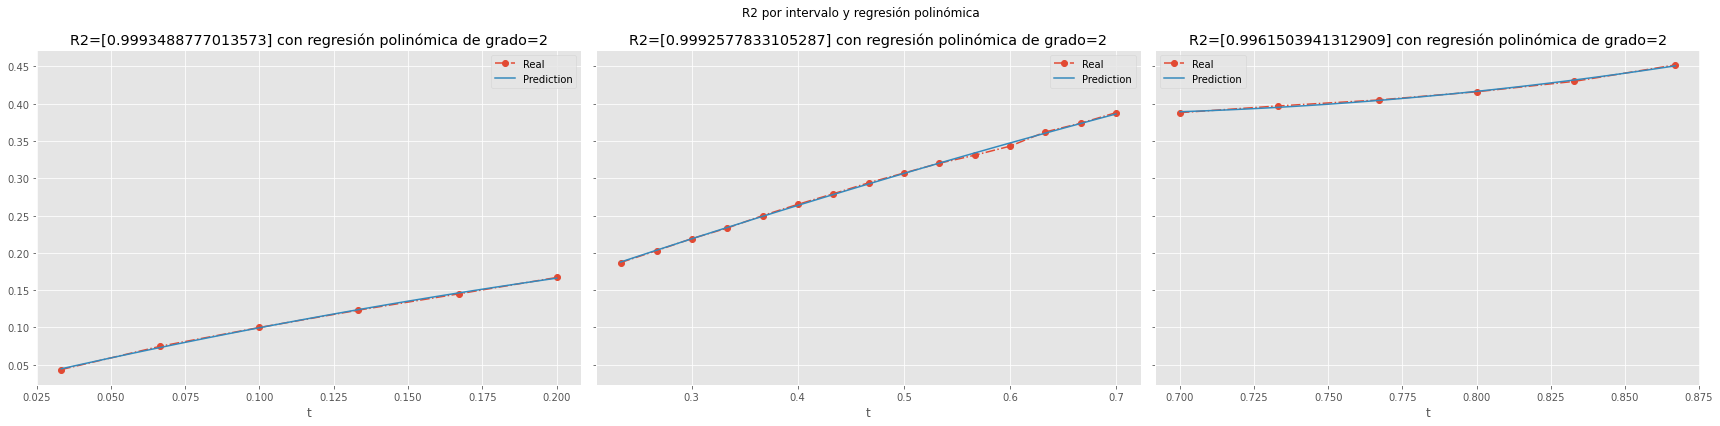

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3*8, 6), sharey=True)
fig.suptitle("R2 por intervalo y regresión polinómica")

for i, (interval, (clf, poly)) in enumerate(clfs.items()):
    
    X = df.t.values[interval]
    X_linspace = np.linspace(X[0], X[-1], 100).reshape(-1, 1)
    y = df.x.values[interval].reshape(-1, 1)
    
    X_linspace = poly.transform(X_linspace)
    X_ = poly.transform(X.reshape(-1,1)) 
   
    y_hat = clf.predict(X_linspace)
    y_hat_compare = clf.predict(X_)
    r2 = r2_score(y, y_hat_compare)

    ax[i].set_title(f"R2=[{r2}] con regresión polinómica de grado={poly.degree}")
    ax[i].plot(X, y,label="Real", marker="o", linestyle="dashdot")
    ax[i].plot(X_linspace[:,1], y_hat, label="Prediction")
    ax[i].set_xlabel("t")
    ax[i].legend()

plt.tight_layout()
plt.show()

Sus ecuaciones son

In [79]:
# ^
for interval, (linear_regression, _) in clfs.items():
    coefs = " + ".join(["({})*x**{}".format(c, i) for i,c in enumerate(linear_regression.coef_[0][1:], start=1)])
    equation_str = f"{linear_regression.intercept_[0]} + {coefs}"
    print(f"Intervalo: [{interval.start},{interval.stop})")
    print(f"Polinomio: {equation_str}")
    print()

Intervalo: [0,6)
Polinomio: 0.013840281129137821 + (0.9537553241452584)*x**1 + (-0.9627691967818686)*x**2

Intervalo: [6,21)
Polinomio: 0.07259226382141762 + (0.5167279346319021)*x**1 + (-0.09809678322826526)*x**2

Intervalo: [20,26)
Polinomio: 0.9937229706800419 + (-1.8582991429583262)*x**1 + (1.421087937883159)*x**2



Ahora, si calculamos la derivada con respecto al tiempo de cada polinomio que representa su posición en x, obtendremos una ecuación para la velocidad 
teórica, ahora lo compararemos con la velocidad experimental obtenida

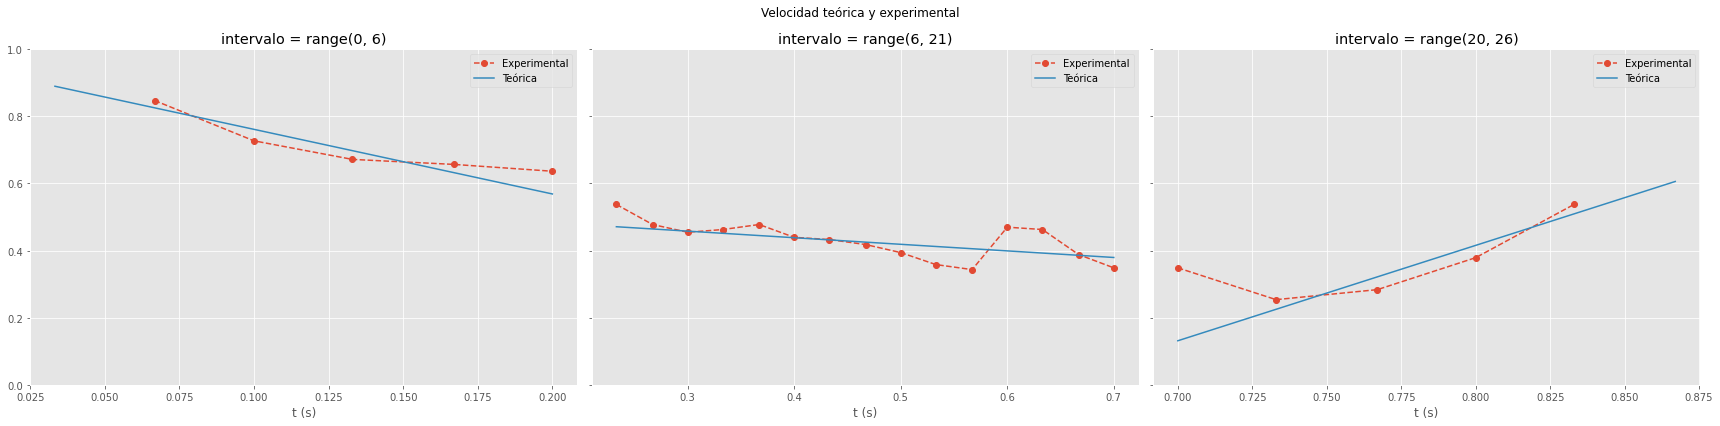

In [82]:
def get_derivative_poly(
    clf: LinearRegression,
    poly: PolynomialFeatures
) -> Callable[[float], float]:
    def f(x: np.ndarray) -> float:
        x_ = poly.transform(x)[:, :-1]
        betas = clf.coef_[:, 1:].T
        one_to_n = np.expand_dims(np.arange(len(betas)), -1) + 1
        derivatives = np.dot(x_,( one_to_n * betas))
        return derivatives
    return f

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3*8, 6), sharey=True)
fig.suptitle("Velocidad teórica y experimental")

for i, (intervalo, (clf, poly)) in enumerate(clfs.items()):
    derivative = get_derivative_poly(clf, poly)
    
    time = df.t.values[intervalo]
    time_theoretical = np.linspace(time[0], time[-1], 100).reshape(-1, 1)
    
    experimental_velocity = df.vx.values[intervalo]
    theroetical_velocity = derivative(time_theoretical)

    ax[i].set_title(f"{intervalo = }")
    ax[i].plot(time, experimental_velocity,label="Experimental", linestyle="--", marker="o")
    ax[i].plot(time_theoretical, theroetical_velocity, label="Teórica")
    ax[i].set_xlabel("t (s)")
    ax[i].legend()

plt.ylim([0,1])
plt.tight_layout()
plt.show()